In [10]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

from datetime import datetime



In [2]:
Stocks = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in Stocks:
    globals()[stock] = DataReader(stock,'yahoo',start,end) 

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,78.620591,76.612234,77.549567,77.722903,1.445974e+08,77.388410
std,18.517119,17.779188,18.263460,18.162083,6.736941e+07,18.305775
min,54.110001,52.767502,53.465000,53.542500,4.661760e+07,53.016479
25%,65.781872,64.291250,64.675625,65.437498,1.006259e+08,64.989147
50%,75.147499,72.343750,73.822498,73.903748,1.275770e+08,73.483952
75%,86.415623,83.109373,83.243126,84.518747,1.676812e+08,84.366631
max,137.979996,130.529999,137.589996,134.179993,4.184740e+08,134.179993


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-09 to 2020-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


In [13]:
AAPL['Adj Close'].iplot()

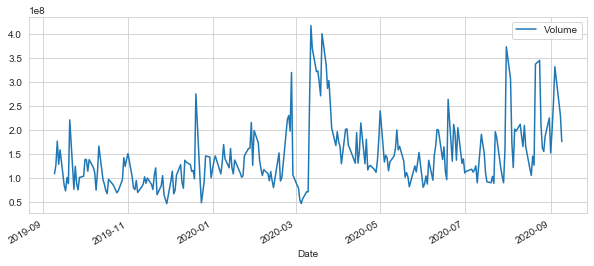

In [9]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [20]:
ma_day = [10,20,50] #multipal moving averages, 10 day, 20 day and 50 day.

In [19]:

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

KeyError: "['MA for 10 days', 'MA for 50 days', 'MA for 20 days'] not in index"

In [21]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [25]:
AAPL['Daily Return'].iplot(legend=True)

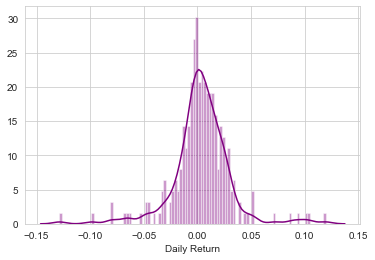

In [28]:

sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

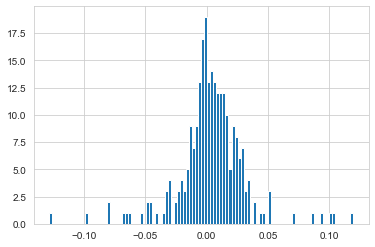

In [29]:
AAPL['Daily Return'].hist(bins=100)

In [32]:
closing_detail = DataReader(Stocks,'yahoo',start,end)['Adj Close']

In [33]:
closing_detail.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-09,53.016479,1204.410034,135.972031,1831.349976
2019-09-10,53.642761,1206.000000,134.548248,1820.550049
2019-09-11,55.348343,1220.170044,134.587753,1822.989990
2019-09-12,55.224567,1234.250000,135.972031,1843.550049
2019-09-13,54.150230,1239.560059,135.774261,1839.339966


In [35]:
data = closing_detail.pct_change()

In [36]:
data.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-09,NaN,NaN,NaN,NaN
2019-09-10,0.011813,0.001320,-0.010471,-0.005897
2019-09-11,0.031795,0.011750,0.000294,0.001340
2019-09-12,-0.002236,0.011539,0.010285,0.011278
2019-09-13,-0.019454,0.004302,-0.001454,-0.002284


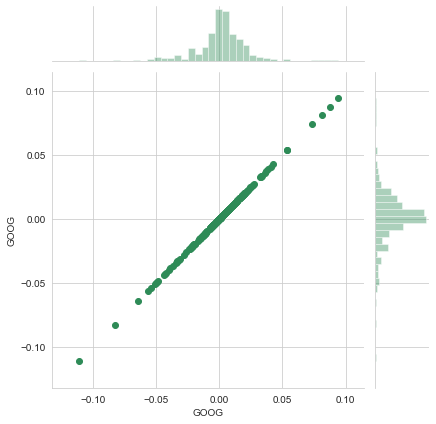

In [38]:
sns.jointplot('GOOG','GOOG',data,kind='scatter',color='seagreen')

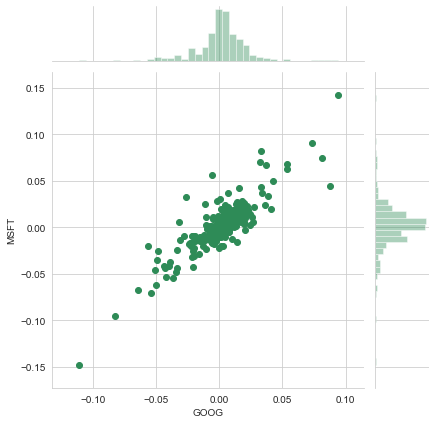

In [40]:
sns.jointplot('GOOG','MSFT',data,kind='scatter',color='seagreen')

In [41]:
data.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-09,NaN,NaN,NaN,NaN
2019-09-10,0.011813,0.001320,-0.010471,-0.005897
2019-09-11,0.031795,0.011750,0.000294,0.001340
2019-09-12,-0.002236,0.011539,0.010285,0.011278
2019-09-13,-0.019454,0.004302,-0.001454,-0.002284


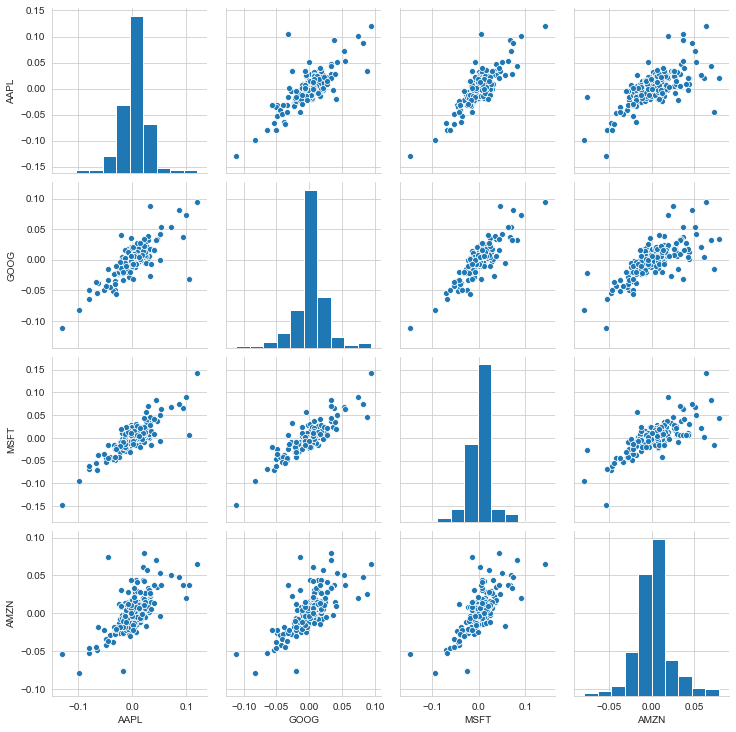

In [42]:
sns.pairplot(data.dropna())

In [45]:
#Let's go ahead and define a value at risk parameter for our stocks.
#We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for 
#a given confidence interval. Theres several methods we can use for estimating a value at risk.
#Let's go ahead and see some of them in action.


#Value at risk using the "bootstrap" method

In [47]:
Data1 = data.dropna()

In [48]:
Data1.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-10,0.011813,0.001320,-0.010471,-0.005897
2019-09-11,0.031795,0.011750,0.000294,0.001340
2019-09-12,-0.002236,0.011539,0.010285,0.011278
2019-09-13,-0.019454,0.004302,-0.001454,-0.002284
2019-09-16,0.005257,-0.006664,-0.007209,-0.017126


In [49]:
Data1['AAPL'].quantile(0.05)

#The 0.05 empirical quantile of daily returns is at -0.037. 
#That means that with 95% confidence, our worst daily loss will not exceed 3.7%. 
#If we have a 1 million dollar investment, our one-day 5% VaR is 0.037 * 1,000,000 = $37,000.

-0.03739927877943003

In [50]:
Data1['GOOG'].quantile(0.05)

-0.03899236001034636

In [52]:
Data1['MSFT'].quantile(0.05)

-0.041179413372621564

In [53]:
Data1['AMZN'].quantile(0.05)

-0.028110737149851753